In [1]:
import sys
import os
# os.environ['JAX_PLATFORM_NAME'] = 'cpu'

import numpy as np
import time

# Add the parent directory (project root) to sys.path
script_dir = os.path.dirname(os.curdir)
parent_dir = os.path.abspath(os.path.join(script_dir, '..', '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# ------------------------------------------------------------------
#! General
import QES.general_python.common.binary as Binary
from QES.general_python.common.timer import Timer, timeit
from QES.general_python.common.binary import JAX_AVAILABLE, get_backend, get_global_logger
from QES.general_python.common.plot import Plotter, MatrixPrinter, colorsCycle, linestylesCycle

# ------------------------------------------------------------------
from QES.Algebra.Model.Interacting.Spin.ultrametric import UltrametricModel
from QES.Algebra.hilbert import HilbertSpace

# ------------------------------------------------------------------
from QES.Algebra.Properties import time_evo
from QES.general_python.algebra.linalg import act, overlap, overlap_diag


19_05_2025_16-35_35 [INFO] Log file created: ./log/QES_19_05_2025_16-35_35.log
19_05_2025_16-35_35 [INFO] Log level set to: info
19_05_2025_16-35_35 [INFO] ############Global logger initialized.############
19_05_2025_16-35_35 [INFO] JAX backend available and successfully imported
19_05_2025_16-35_35 [INFO] 	JAX 64-bit precision enabled.
19_05_2025_16-35_35 [INFO] Setting JAX as the active backend.
19_05_2025_16-35_35 [INFO] **************************************************
19_05_2025_16-35_35 [INFO] Backend Configuration:
19_05_2025_16-35_35 [INFO] 		NumPy Version: 1.26.4
19_05_2025_16-35_35 [INFO] 		SciPy Version: 1.13.1
19_05_2025_16-35_35 [INFO] 		JAX Version: 0.6.0
19_05_2025_16-35_35 [INFO] 		Active Backend: jax
19_05_2025_16-35_35 [INFO] 			JAX Available: True
19_05_2025_16-35_35 [INFO] 			Default Seed: 42
19_05_2025_16-35_35 [INFO] 		JAX Backend Details:
19_05_2025_16-35_35 [INFO] 				Main Module: jax.numpy
19_05_2025_16-35_35 [INFO] 				Random Module: jax.random (+ PRNGKey)
1

In [2]:
model   = UltrametricModel(
    ns      = 10,
    n       = 3,
    alphas  = 0.8,
    backend = np
)

In [3]:
model.build()

In [4]:
model.diagonalize(verbose=True)

19_05_2025_16-35_35 [INFO] 	->[Hamiltonian] Diagonalization started using (standard)...
19_05_2025_16-35_35 [INFO] 		->[Hamiltonian] Diagonalization (standard) completed in 0.150771 seconds.


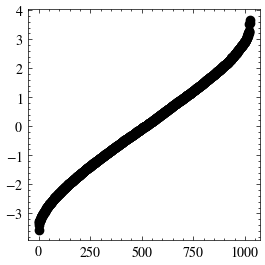

In [8]:
fig, ax = Plotter.get_subplots(1, 1, figsize=(3, 3))
ax[0].plot(model.eig_val, 'o', color='black', label='Eigenvalues')